In [1]:
import pandas as pd
import numpy as np 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
source_df = pd.read_csv('../csvs/students_knowledge.csv')
source_df = source_df.loc[:, ~source_df.columns.str.contains('^Unnamed')]
source_df = source_df.drop('Attribute Information:', axis=1)
source_df.head()

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,very_low
1,0.08,0.08,0.10,0.24,0.90,High
2,0.06,0.06,0.05,0.25,0.33,Low
3,0.10,0.10,0.15,0.65,0.30,Middle
4,0.08,0.08,0.08,0.98,0.24,Low


In [3]:
df = source_df.drop(' UNS', axis=1)
df.head()

,STG,SCG,STR,LPR,PEG
0,0.00,0.00,0.00,0.00,0.00
1,0.08,0.08,0.10,0.24,0.90
2,0.06,0.06,0.05,0.25,0.33
3,0.10,0.10,0.15,0.65,0.30
4,0.08,0.08,0.08,0.98,0.24


In [4]:
X = df.values[:,:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[-1.76851922, -1.68126919, -1.90661929, -1.74744134, -1.80019743],
       [-1.38731871, -1.30311004, -1.49922538, -0.77824063,  1.73315205],
       [-1.48261884, -1.39764983, -1.70292233, -0.73785726, -0.50463595],
       ...,
       [ 0.80458427,  2.19486207,  0.98587747, -0.57632381,  1.22277934],
       [ 0.61398401,  1.86397282,  1.39327138,  0.71594381, -0.77945202],
       [ 1.37638505,  2.57302122,  1.18957442,  1.76591125,  1.10500103]])

In [5]:
k_means = KMeans(init = "k-means++", n_clusters = 4, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[0 0 0 1 1 0 0 1 1 3 3 1 1 3 3 3 3 0 0 0 1 0 0 1 1 3 1 1 1 3 3 1 1 0 0 1 1
 0 1 1 1 3 3 1 1 3 3 3 2 0 0 0 1 0 0 1 1 3 3 1 1 3 3 1 1 0 0 0 0 0 0 0 1 3
 3 1 1 3 3 3 1 0 0 1 1 1 0 1 1 3 3 1 1 3 3 1 1 0 0 0 1 0 0 1 1 3 3 3 1 3 3
 3 2 0 0 1 1 2 0 0 1 1 3 3 2 2 3 3 1 1 0 0 1 2 0 0 1 1 3 3 1 1 3 3 3 2 0 1
 1 2 0 0 1 1 3 3 3 2 3 3 1 1 0 0 1 0 0 2 1 0 3 3 2 1 3 3 1 2 0 0 1 2 0 0 1
 1 3 3 1 2 3 3 3 2 0 0 1 1 0 1 1 2 3 3 2 1 3 3 1 2 0 0 2 2 3 0 1 2 3 3 1 2
 3 3 1 2 0 0 2 2 0 0 1 2 3 3 1 2 3 3 1 2 0 0 1 2 0 0 2 2 3 3 1 2 3 3 1 2]


In [6]:
df["Clus_km"] = labels
df.head()

,STG,SCG,STR,LPR,PEG,Clus_km
0,0.00,0.00,0.00,0.00,0.00,0
1,0.08,0.08,0.10,0.24,0.90,0
2,0.06,0.06,0.05,0.25,0.33,0
3,0.10,0.10,0.15,0.65,0.30,1
4,0.08,0.08,0.08,0.98,0.24,1


In [7]:
mapping_dict = { 0: 'very_low', 1: 'Low', 2:'High', 3:'Middle'}
source_df["Km_label"] = [mapping_dict[x] for x in df['Clus_km']]
source_df['eq'] = np.where(source_df[" UNS"] == source_df["Km_label"], True, False)
# source_df.to_csv("students_kmeans_res.csv", index=False)
# source_df
'accuration : ' + str(round(source_df.loc[source_df['eq'] == True].count()[1] / source_df.shape[0] * 100, 3)) + ' %'

'accuration : 48.062 %'

Text(0.5, 0, 'PEG')

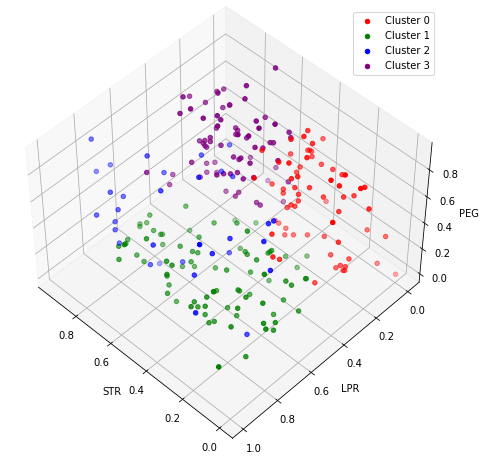

In [8]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 

fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()

colors = ['red', 'green', 'blue', 'purple']
for i in range(max(labels) + 1):
    ax_df = df.where(df["Clus_km"] == i)
    ax.scatter(ax_df['STR'], ax_df['LPR'], ax_df['PEG'], c=colors[i], label='Cluster '+str(i))

ax.legend()
ax.set_xlabel('STR')
ax.set_ylabel('LPR')
ax.set_zlabel('PEG')